# Documentação

!pip install yfinance

### Artigo ARIMA:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Modelo SARIMA:
https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

### Uso do Auto-ARIMA:
Metodo busca tanto ARIMA como SARIMA.

https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

### R2Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [9]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from functions import get_finance_data, arima_forecast, stationary_test, get_auto_arima, get_auto_sarima

In [2]:
df = get_finance_data('RBBV11.SA')[:-50]
train = df['Low'][:-30]
test = df['Low'][-30:]

In [35]:
arima_forecast(train, 30, 0,1,4)

array([91.04612839, 91.15669259, 91.00874874, 91.10555923, 91.12401285,
       91.14246648, 91.1609201 , 91.17937373, 91.19782735, 91.21628098,
       91.2347346 , 91.25318823, 91.27164185, 91.29009547, 91.3085491 ,
       91.32700272, 91.34545635, 91.36390997, 91.3823636 , 91.40081722,
       91.41927085, 91.43772447, 91.4561781 , 91.47463172, 91.49308535,
       91.51153897, 91.5299926 , 91.54844622, 91.56689984, 91.58535347])

In [34]:
df_f['ARIMA'].values

array([91.04612495, 91.15669159, 91.0087324 , 91.1055453 , 91.12399397,
       91.14244264, 91.16089131, 91.17933998, 91.19778866, 91.21623733,
       91.234686  , 91.25313467, 91.27158334, 91.29003202, 91.30848069,
       91.32692936, 91.34537803, 91.3638267 , 91.38227538, 91.40072405,
       91.41917272, 91.43762139, 91.45607006, 91.47451874, 91.49296741,
       91.51141608, 91.52986475, 91.54831342, 91.5667621 , 91.58521077])

In [12]:
arima_model = get_auto_arima(train)


Best model:  ARIMA(0,1,4)(0,0,0)[0] intercept
Total fit time: 0.539 seconds


In [13]:
sarima_model = get_auto_sarima(train)


Best model:  ARIMA(0,1,1)(4,1,0)[12]          
Total fit time: 35.240 seconds


In [15]:
df_f = pd.DataFrame({'ARIMA':arima_model.predict(n_periods=30), 
                     'SARIMA':sarima_model.predict(n_periods=30),
                     'valor':test}, index=test.index)
df_f['d% ARIMA'] = ((df_f['ARIMA']/df_f['valor'])-1)*100
df_f['d% SARIMA'] = ((df_f['SARIMA']/df_f['valor'])-1)*100
prd = df_f
df_f

,ARIMA,SARIMA,valor,d% ARIMA,d% SARIMA
Date,,,,,
2020-08-28,91.046125,90.827420,90.910004,0.149732,-0.090842
2020-08-31,91.156692,90.875304,91.000000,0.172189,-0.137029
2020-09-01,91.008732,91.277039,91.019997,-0.012376,0.282403
2020-09-02,91.105545,90.822458,90.500000,0.669111,0.356307
2020-09-03,91.123994,91.008603,91.610001,-0.530517,-0.656476
2020-09-04,91.142443,91.089607,91.000000,0.156530,0.098469
2020-09-08,91.160891,90.732777,91.010002,0.165794,-0.304609
2020-09-09,91.179340,91.155710,91.000000,0.197077,0.171110
2020-09-10,91.197789,91.233812,91.010002,0.206336,0.245918


<function matplotlib.pyplot.show(*args, **kw)>

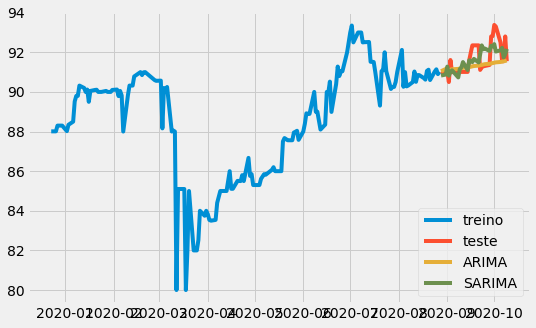

In [21]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd['ARIMA'], label="ARIMA")
plt.plot(prd['SARIMA'], label="SARIMA")
plt.legend(loc='lower right')
plt.show